### 1. Upload data

In [1]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/master/Library/Line%20plots/data.dta", clear

### 2. Getting the treatment effect

In [2]:
qui reg y_var x_var post x_var_post control

### 3. Saving values for the graph

In [3]:
local   beta_pre  = round(_b[x_var],0.001)
local 	beta_post = round(_b[x_var] + _b[x_var_post],0.001)

qui test 	_b[x_var_post] = 1
local 	f_pre = round(r(p),0.001)
qui if 		`f_pre' == 0 local f_pre = "0.000"

qui test 	_b[x_var_post] + _b[x_var_post] = 1
local 	f_post = round(r(p),0.001)

### 4. Creating the graph

In [ ]:
twoway 	(lfitci y_hat x_var if post == 1, color("222 235 247") lwidth(.05)) ///
	(lfitci y_hat x_var if post == 0, color(gs15)) /// 
	(lfit	x_var x_var	if post == 1, color(red) lwidth(.5) lpattern(dash)) ///
	(lfit 	y_hat x_var	if post == 0, color(gs8) lwidth(.5)) /// 
	(lfit 	y_hat x_var	if post == 1, color(edkblue) lwidth(.5)), ///
	text(5 9 "Pre-treatment" "Regression coefficent: 0`beta_pre'" "P-value of coefficent = 1: `f_pre'" ///
		 12 9 "Post-treatment" "Regression coefficent: 0`beta_post'" "P-value of coefficent = 1: 0`f_post'", ///
		 orient(horizontal) size(vsmall) justification(center) fcolor(white) box margin(small)) ///
	xtitle("Independent variable value") ///
	ytitle("Predicted value of dependent variable") ///
	legend(order (6 "Pre-treatment" 7 "Post-treatment" 3 "Pre-treatment 95%CI" 1 "Pre-treatment 95%CI")) ///
	graphregion(color(white)) bgcolor(white)

### 5. Exporting the graph


> `f_post'",    orient(horizontal) size(vsmall) justification(center) fcolor(white) box margin(small))  xtitle("Independent variable value")  ytitle("Predicted value of dependent variable")  legend(order (6 "Pre-treatment" 7 "Post-treatment" 3 "Pre-treatm
> ent 95%CI" 1 "Pre-treatment 95%CI"))  graphregion(color(white)) bgcolor(white)

. noi gr export C:/Users/Saori/.stata_kernel_cache/graph${stata_kernel_graph_counter}.png, width(600) replace        


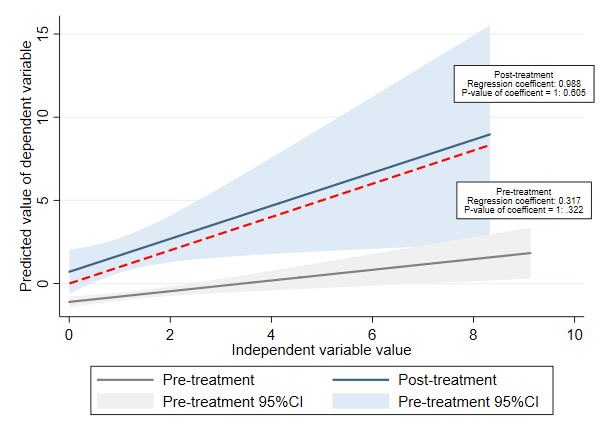



. global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1        

. `629045ccbbd206d5dbc9232b5e15f1ed'



In [5]:
qui gr export "figure.png", width(5000) replace